In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

import neuro_op as nop

In [2]:
nop.RANDOM_SEED = 112571560740682987948487733925061957463

In [3]:
nop.plot_setup()

In [4]:
mu_prior, sd_prior = 1, 100
mu_arr = np.linspace(-4, 4, 1000)
world_data = st.norm.rvs(loc=0, scale=1, size=5)

In [5]:
node_g = nop.NodeGridMu(
    node_id=0,
    log_priors=st.norm.logpdf(x=mu_arr, loc=mu_prior, scale=sd_prior),
)

node_c = nop.NodeConjMu(
    node_id=1,
    params_node=dict(loc=mu_prior, scale=sd_prior),
)

g_samples = []
for i, x in enumerate(world_data):
    node_g.set_updated_belief(st.norm, mu_arr, 1, x, -1, i)
    g_samples += [node_g.log_probs.copy()]
    node_c.set_updated_belief(x, -1, i)

g_samples = np.array(g_samples)

mu_p_arr, sd_p_arr = nop.postrun_Mu_ConjMu(mu_prior, sd_prior, 1, node_c.diary_in)
p_samples = np.zeros_like(g_samples)
for i, params in enumerate(zip(mu_p_arr, sd_p_arr)):
    p_samples[i] = st.norm.logpdf(mu_arr, loc=params[0], scale=params[1])

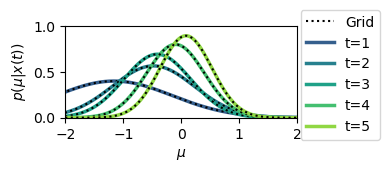

In [6]:
fig, ax = plt.subplots(1, 1)
cmap = nop.get_colorcycle(len(g_samples))

k = 1
ax.set_prop_cycle(
    color=nop.get_colorcycle(len(g_samples) + k)[k:],
)
ax.plot(0, 0, c="black", lw=1.5, ls=":", label="Grid")

for i, y in enumerate(zip(g_samples, p_samples)):
    ax.plot(mu_arr, np.exp(y[1]), lw=2.5, label=f"t={i+1}")
    ax.plot(
        mu_arr,
        np.exp(y[0]) * np.max(np.exp(y[1])),
        c="black",
        ls=":",
        lw=1.5,
    ),
ax.set_xlabel("$\mu$")
ax.set_ylabel("$p(\mu | x(t))$")
ax.set_xlim(-2, 2)
ax.set_ylim(0, 1)
fig.legend(loc="right", bbox_to_anchor=(1.27, 0.61))

In [9]:
fig.savefig("fig/Analysis-Class_Consistency.pdf")